## Import all required tools

In [1]:
import ixmp
import message_ix
import numpy as np
import pandas as pd
import yaml

import matplotlib.pyplot as plt

from collections.abc import Mapping
from itertools import repeat
from message_ix.models import MESSAGE_ITEMS
from message_ix.utils import make_df
from message_ix.tools.add_dac import add_tech
from message_ix.tools.add_dac import get_report

%matplotlib inline


mp = ixmp.Platform()


<IPython.core.display.Javascript object>

C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\reporting\__init__.py:98: FutureWarning: Importing from genno.computations will be deprecated in a future version; use genno.operator instead.
  ("tom:nl-t-yv-ya", (genno.computations.add, "fom:nl-t-yv-ya", "vom:nl-t-yv-ya")),


## Varying `SSP` and `growth_activity_up`

In [2]:
ssps = ["SSP1","SSP2","SSP3","SSP4","SSP5"]
mpens = {
    "mpen1": 0.050,
    "mpen2": 0.075,
    "mpen3": 0.100,
    "mpen4": 0.125,
    "mpen5": 0.150,
        }

mpen scenario: SSP1 mpen1


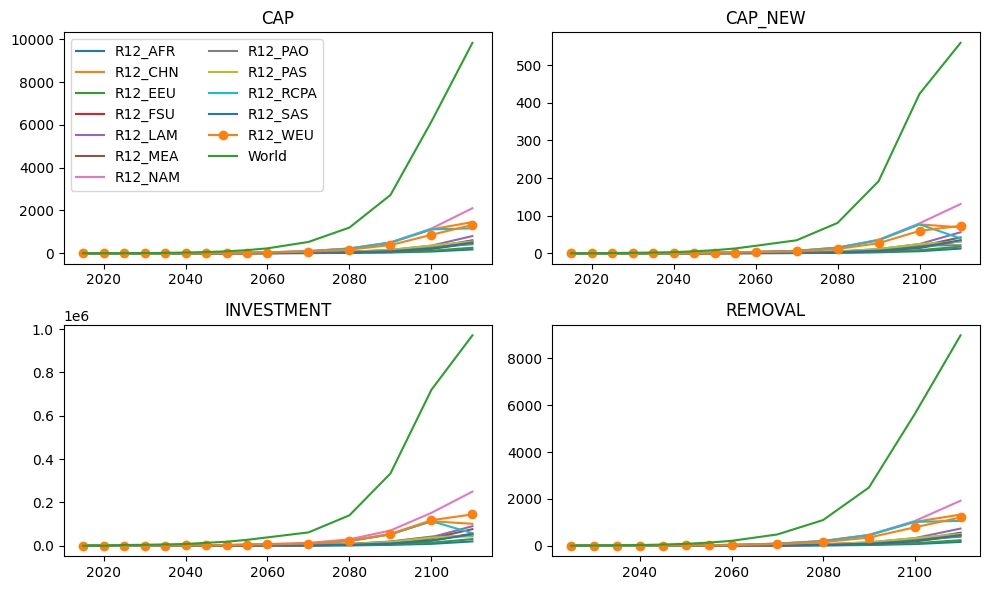

mpen scenario: SSP1 mpen2


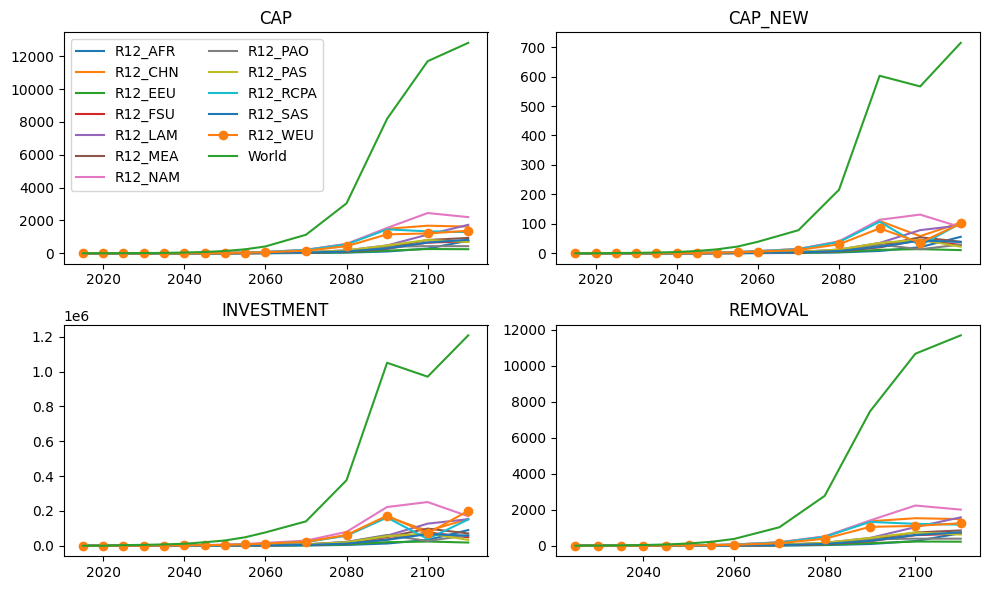

mpen scenario: SSP1 mpen3


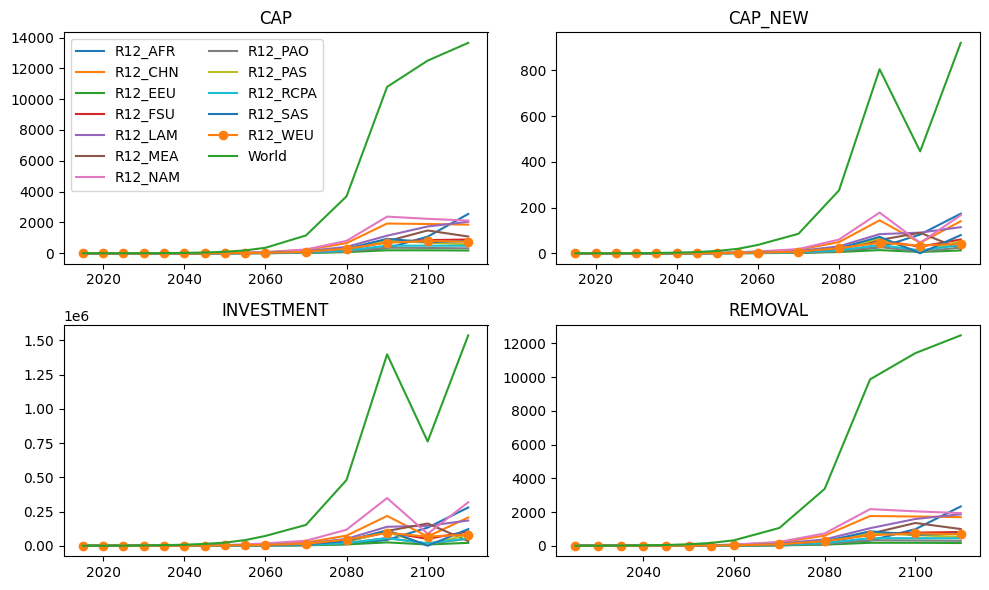

mpen scenario: SSP1 mpen4


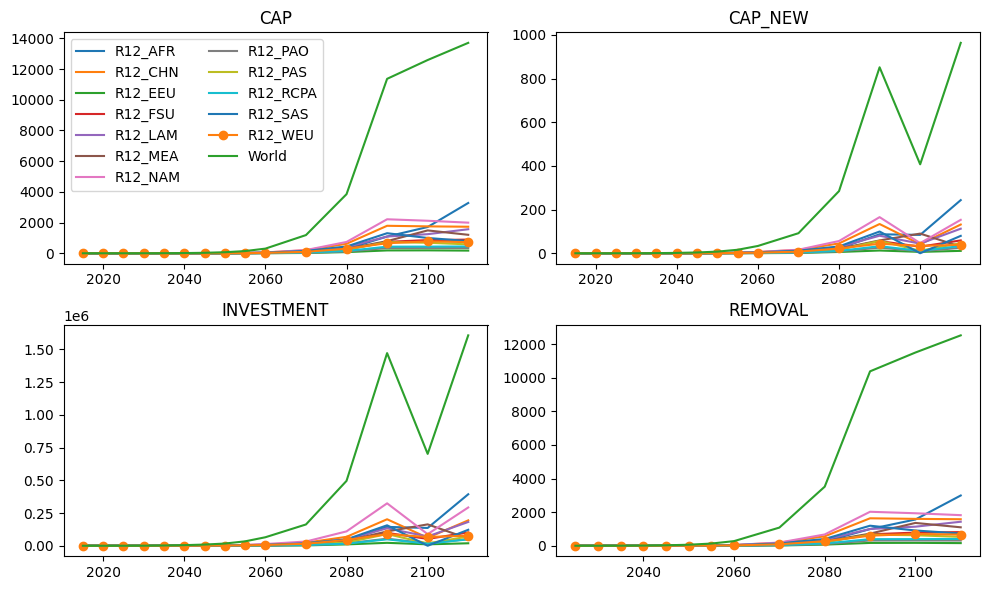

mpen scenario: SSP1 mpen5


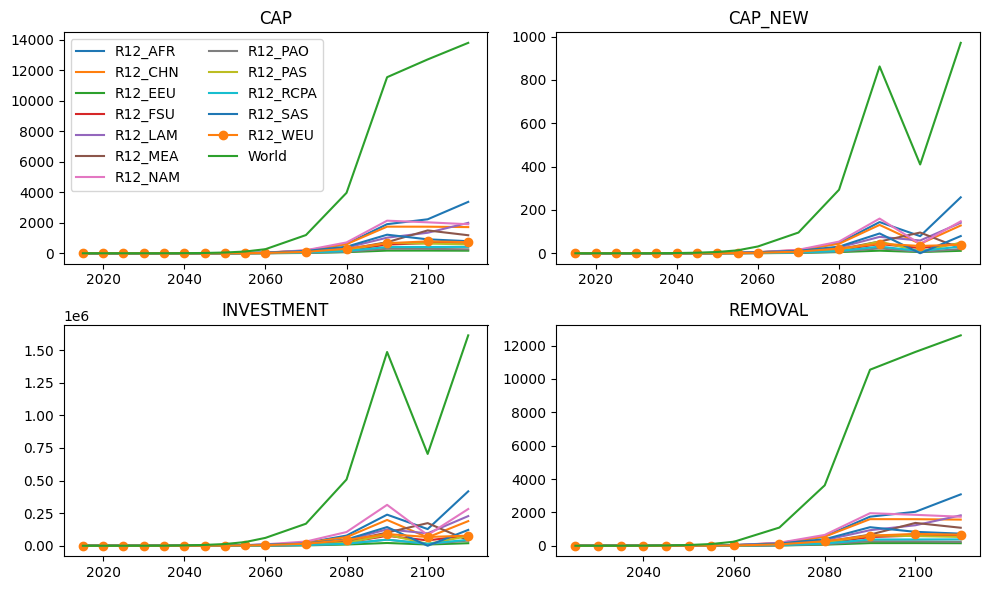

mpen scenario: SSP2 mpen1
mpen scenario: SSP2 mpen2
mpen scenario: SSP2 mpen3
mpen scenario: SSP2 mpen4
mpen scenario: SSP2 mpen5
mpen scenario: SSP3 mpen1
mpen scenario: SSP3 mpen2
mpen scenario: SSP3 mpen3
mpen scenario: SSP3 mpen4
mpen scenario: SSP3 mpen5
mpen scenario: SSP4 mpen1
mpen scenario: SSP4 mpen2
mpen scenario: SSP4 mpen3
mpen scenario: SSP4 mpen4
mpen scenario: SSP4 mpen5
mpen scenario: SSP5 mpen1
mpen scenario: SSP5 mpen2
mpen scenario: SSP5 mpen3
mpen scenario: SSP5 mpen4
mpen scenario: SSP5 mpen5


In [3]:
# this is to import scenario from data base and clone to local
for ssp in ssps:
    for key,val in mpens.items():
        dacsspscen = message_ix.Scenario(mp, model=f'SSP_dev_{ssp}_v0.1_dac', scenario="1000f_v0.13_dac-co2split")
        dacmp_scen = dacsspscen.clone(
            f"SSP_dev_{ssp}_v0.1_dac",
            f"1000f_v0.13_dac-co2split_{key}",
            f"{ssp}_dev 1000f carbon budget with {key} dac and split CO2 transmission and disposal",
            keep_solution=False, 
        )
        dacmp_scen.check_out()

        # Updating market penetration rates
        DAC_mpen_rem = dacmp_scen.par("growth_activity_up", {"technology":"DAC_mpen"})
        DAC_mpen_add = DAC_mpen_rem.copy()
        DAC_mpen_add["value"] = val

        dacmp_scen.remove_par("growth_activity_up", DAC_mpen_rem)
        dacmp_scen.add_par("growth_activity_up", DAC_mpen_add)

        # add emission bound
        dacmp_scen.commit(comment=f"{ssp}_dev 1000f with DAC {key} scenario")
        dacmp_scen.set_as_default()

        dacmp_scen.solve(solve_options={'scaind': '1'})
        dacmp_scen.var("OBJ")["lvl"]

        # Get Report
        print("mpen scenario:", ssp, key)
        if ssp == "SSP1":
            scenariotec = ['dac_lt','dac_ht']
            scenario_report = get_report(dacmp_scen,scenariotec)

## Close connection

In [4]:
mp.close_db()